In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, re, subprocess, sys, json, glob
#from molmod import *
#from molmod.io import FCHKFile
#from molmod.io.xyz import XYZReader, XYZFile
import requests
#import wts
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score # klein geschrieben =>klasse
from sklearn.model_selection import KFold



In [2]:
def objecthash(df, col1, col2):
    dfb = pd.DataFrame({col2:df[col2].value_counts().index})
    for c1 in df[col1].value_counts().index:
        ls = []
        for c2 in df[col2].value_counts().index:
            try:
               # print(c1,c2,df.groupby([col1,col2]).size().loc[c1].loc[c2])
                ls.append(df.groupby([col1,col2]).size().loc[c1].loc[c2])
            except:
                #print(c1,c2,0)
                ls.append(0)
        dfb[c1] = ls
    
    dfb = dfb.set_index(col2)
    return dfb
            

In [3]:
def hashmap(dflg,col1,col2):
    #sns.set (rc = {'figure.figsize':(8, 5)})
    ax = sns.heatmap(objecthash(dflg,col1,col2),linewidths=0.5,annot= True)#,yticklabels=1)
    #ax = sns.heatmap(objecthash(dflg,col1,col2),annot= True)#,yticklabels=1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    #sns.set(font_scale=200)
    ax.set_xlabel(col1)
    
    return ax

In [4]:
df = pd.read_csv("df1.csv")
df  = df[df["Kategorie2"]!= "other"]

In [5]:
df.shape

(50, 21)

In [6]:
df  = df[df["Kategorie2"]!= "other"]

In [7]:
df["Kategorie2"].value_counts().index

Index(['C_His/Met', 'B_-/HIS', '*_HIS/HIS'], dtype='object')

In [8]:
dic = {'C_His/Met':1, 'B_-/HIS':0, '*_HIS/HIS':-1}

In [9]:
df["Kat"]=[dic[i]for i in df["Kategorie2"]]

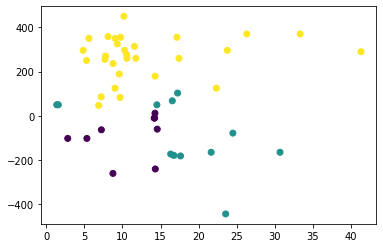

In [10]:
plt.scatter(df["ruffling"],df["Em_lit"], c = df["Kat"])

In [11]:
X = df[["ruffling", "Em_lit"]]
scaler =  StandardScaler()
x_transformed = scaler.fit_transform(X)

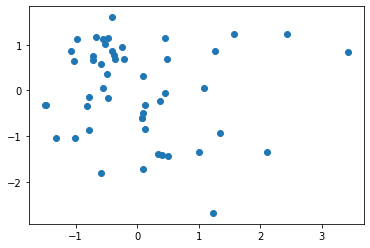

In [12]:
plt.scatter(x_transformed[:,0],x_transformed[:,1])

Text(0.5, 1.0, '60.75516661115926')

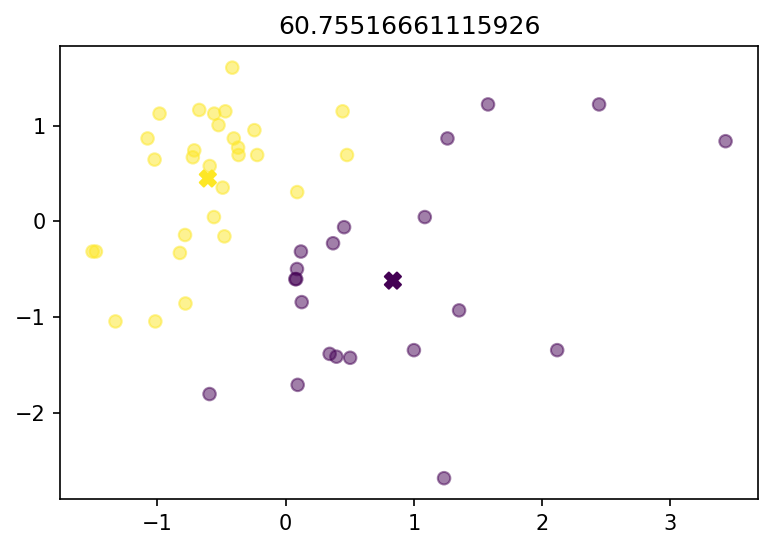

In [13]:
X = df[["ruffling", "Em_lit"]]
scaler =  StandardScaler()
x_transformed = scaler.fit_transform(X)


model  =KMeans(n_clusters = 2)
model.fit(x_transformed)
cluster1 = model.cluster_centers_
cluster2 = scaler.inverse_transform(model.cluster_centers_) 
plt.figure(dpi=150)
#plt.scatter(df["ruffling"],df["Em_lit"], c = df["Kat"])
plt.scatter(x_transformed[:,0],x_transformed[:,1], c = model.labels_, alpha = 0.5)
plt.scatter(cluster1[:,0],cluster1[:,1],marker = "X",s = 60, c = list(range(len(cluster1))) )
plt.title(model.inertia_)


Text(0.5, 1.0, '36.91271057140492')

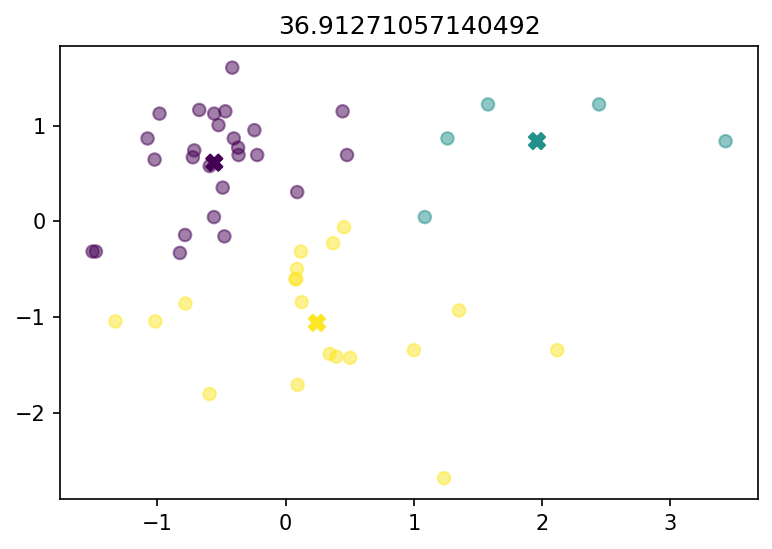

In [14]:
X = df[["ruffling", "Em_lit"]]
scaler =  StandardScaler()
x_transformed = scaler.fit_transform(X)


model  =KMeans(n_clusters = 3)
model.fit(x_transformed)
cluster1 = model.cluster_centers_
cluster2 = scaler.inverse_transform(model.cluster_centers_) 
plt.figure(dpi=150)
#plt.scatter(df["ruffling"],df["Em_lit"], c = df["Kat"])
plt.scatter(x_transformed[:,0],x_transformed[:,1], c = model.labels_, alpha = 0.5)
plt.scatter(cluster1[:,0],cluster1[:,1],marker = "X",s = 60, c = list(range(len(cluster1))) )
plt.title(model.inertia_)


Text(0.5, 1.0, '24.989738896698572')

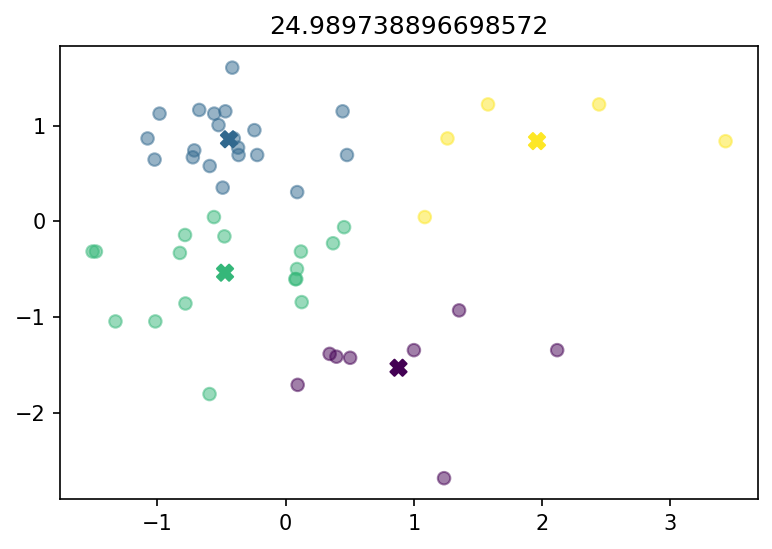

In [15]:
X = df[["ruffling", "Em_lit"]]
scaler =  StandardScaler()
x_transformed = scaler.fit_transform(X)


model  =KMeans(n_clusters = 4)
model.fit(x_transformed)
cluster1 = model.cluster_centers_
cluster2 = scaler.inverse_transform(model.cluster_centers_) 
plt.figure(dpi=150)
#plt.scatter(df["ruffling"],df["Em_lit"], c = df["Kat"])
plt.scatter(x_transformed[:,0],x_transformed[:,1], c = model.labels_, alpha = 0.5)
plt.scatter(cluster1[:,0],cluster1[:,1],marker = "X",s = 60, c = list(range(len(cluster1))) )
plt.title(model.inertia_)


Text(0.5, 1.0, '18.71116232421732')

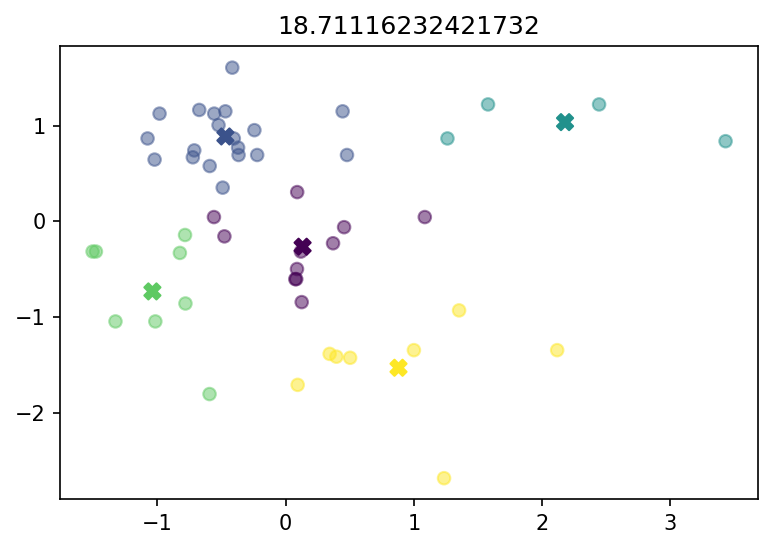

In [16]:
X = df[["ruffling", "Em_lit"]]
scaler =  StandardScaler()
x_transformed = scaler.fit_transform(X)


model  =KMeans(n_clusters = 5)
model.fit(x_transformed)
cluster1 = model.cluster_centers_
cluster2 = scaler.inverse_transform(model.cluster_centers_) 
plt.figure(dpi=150)
#plt.scatter(df["ruffling"],df["Em_lit"], c = df["Kat"])
plt.scatter(x_transformed[:,0],x_transformed[:,1], c = model.labels_, alpha = 0.5)
plt.scatter(cluster1[:,0],cluster1[:,1],marker = "X",s = 60, c = list(range(len(cluster1))) )
plt.title(model.inertia_)


Text(0.5, 1.0, '10.157960157920778')

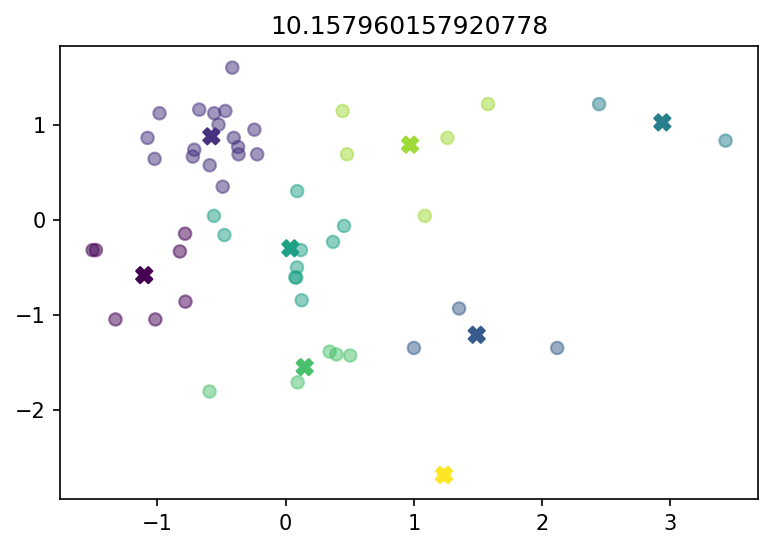

In [17]:
X = df[["ruffling", "Em_lit"]]
scaler =  StandardScaler()
x_transformed = scaler.fit_transform(X)


model  =KMeans(n_clusters = 8)
model.fit(x_transformed)
cluster1 = model.cluster_centers_
cluster2 = scaler.inverse_transform(model.cluster_centers_) 
plt.figure(dpi=150)
#plt.scatter(df["ruffling"],df["Em_lit"], c = df["Kat"])
plt.scatter(x_transformed[:,0],x_transformed[:,1], c = model.labels_, alpha = 0.5)
plt.scatter(cluster1[:,0],cluster1[:,1],marker = "X",s = 60, c = list(range(len(cluster1))) )
plt.title(model.inertia_)


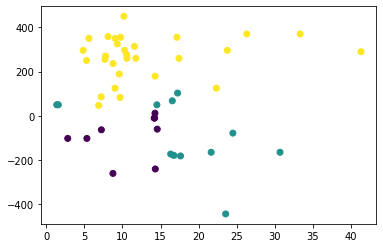

In [18]:
plt.scatter(df["ruffling"],df["Em_lit"], c = df["Kat"])

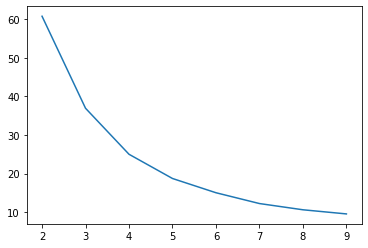

In [19]:
X = df[["ruffling", "Em_lit"]]
scaler =  StandardScaler()
x_transformed = scaler.fit_transform(X)

def  f(n):

    model  =KMeans(n_clusters = n)
    model.fit(x_transformed)
    return model.inertia_
xx = range(2,10)
plt.plot(xx,[f(n)for n in xx])

In [20]:
df  = pd.read_csv("df1.csv")
df = df[df["Kategorie2"]!= "other"]
df1 = df[[c for c in df.columns if True not in df[c].isna().value_counts().index]]
df1 = df1[[c for c in df.columns if df1[c].dtypes in [float, int] ]]

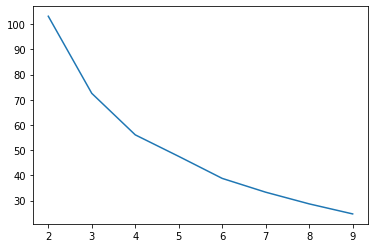

In [21]:

X = df[df1.columns]
X = df[["Em_lit","ruffling","saddling"]]
scaler =  StandardScaler()
x_transformed = scaler.fit_transform(X)

def  f(n):

    model  =KMeans(n_clusters = n)
    model.fit(x_transformed)
    return model.inertia_
xx = range(2,10)
plt.plot(xx,[f(n)for n in xx])

In [22]:
model = KMeans(n_clusters = 3)
model.fit(x_transformed)
model.labels_

array([0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 1, 2, 1, 2, 1], dtype=int32)

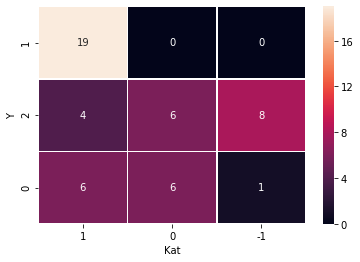

In [23]:
dff = pd.DataFrame({"Y":model.labels_})
dff["Kat"]=[dic[i]for i in df["Kategorie2"]]
hashmap(dff,"Kat","Y")

In [24]:
dfff = dff.copy()
dfff["Kategorie2"] = df["Kategorie2"]

In [25]:
dfr  =pd.DataFrame({"Kategorie2":list(df["Kategorie2"], )})

In [26]:
X["Y"] =model.labels_
X["Kat"] = [dic[i]for i in df["Kategorie2"]]

/home/hagen/anaconda3/envs/KLeich/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/hagen/anaconda3/envs/KLeich/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
XX = X[X["Kat"] == 1]
XX = XX[XX["Y"] == 2]
XX

,Em_lit,ruffling,saddling,Y,Kat
5,47.0,6.872086,11.705291,2,1
45,125.0,9.023329,6.473974,2,1
64,83.0,9.685126,9.579349,2,1
68,179.3,14.284085,6.383501,2,1


In [28]:
df  = pd.read_csv("df2.csv")
df = df[df["Kategorie2"]!= "other"]
df1 = df[[c for c in df.columns if True not in df[c].isna().value_counts().index]]
df1 = df1[[c for c in df.columns if df1[c].dtypes in [float, int] ]]

In [29]:
df1 = df1[df1.columns[:-3]]

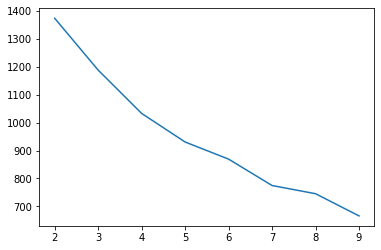

In [30]:

X = df[df1.columns]
#X = df[["Em_lit","ruffling","saddling"]]
scaler =  StandardScaler()
x_transformed = scaler.fit_transform(X)

def  f(n):

    model  =KMeans(n_clusters = n)
    model.fit(x_transformed)
    return model.inertia_
xx = range(2,10)
plt.plot(xx,[f(n)for n in xx])

In [31]:
model = KMeans(n_clusters = 5)
model.fit(x_transformed)
model.labels_

array([2, 3, 0, 1, 4, 3, 4, 0, 2, 1, 0, 4, 2, 1, 4, 1, 4, 2, 4, 4, 4, 1,
       2, 0, 3, 2, 4, 4, 4, 3, 2, 0, 4, 3, 1], dtype=int32)

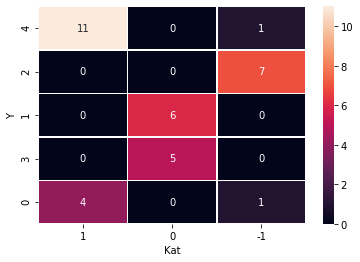

In [32]:
dff = pd.DataFrame({"Y":model.labels_})
dff["Kat"]=[dic[i]for i in df["Kategorie2"]]
hashmap(dff,"Kat","Y")

In [33]:
model = KMeans(n_clusters = 3)
model.fit(x_transformed)
model.labels_

array([0, 2, 0, 0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2,
       0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2], dtype=int32)

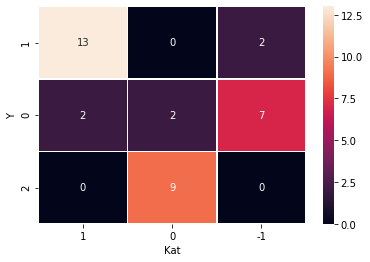

In [34]:
dff = pd.DataFrame({"Y":model.labels_})
dff["Kat"]=[dic[i]for i in df["Kategorie2"]]
hashmap(dff,"Kat","Y")

In [35]:
objecthash(dff,"Kat","Y")+objecthash(dff,"Kat","Y")

,1,0,-1
Y,,,
1,26,0,4
0,4,4,14
2,0,18,0


In [36]:
if(False):
    df  = pd.read_csv("df2.csv")
    df = df[df["Kategorie2"]!= "other"]
    df1 = df[[c for c in df.columns if True not in df[c].isna().value_counts().index]]
    df1 = df1[[c for c in df.columns if df1[c].dtypes in [float, int] ]]
    df1 = df1[df1.columns[:-3]]
    X = df[df1.columns]
    #X = df[["Em_lit","ruffling","saddling"]]
    scaler =  StandardScaler()
    x_transformed = scaler.fit_transform(X)


    model = KMeans(n_clusters = 3)
    model.fit(x_transformed)
    model.labels_
    dff = pd.DataFrame({"Y":model.labels_})
    dff["Kat"]=[dic[i]for i in df["Kategorie2"]]
    a1 = objecthash(dff,"Kat","Y")

    for c in range(0,100):
        model = KMeans(n_clusters = 3)
        model.fit(x_transformed)
        model.labels_
        dff = pd.DataFrame({"Y":model.labels_})
        dff["Kat"]=[dic[i]for i in df["Kategorie2"]]
        a1 = a1+ objecthash(dff,"Kat","Y")
    a1 = a1/c

    ax = sns.heatmap(a1,linewidths=0.5,annot= True)#,yticklabels=1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    #ax.set_xlabel(col1)

In [37]:
if (False):
    df  = pd.read_csv("df1.csv")
    df = df[df["Kategorie2"]!= "other"]
    df1 = df[[c for c in df.columns if True not in df[c].isna().value_counts().index]]
    df1 = df1[[c for c in df.columns if df1[c].dtypes in [float, int] ]]
    df1 = df1[df1.columns[:-3]]
    X = df[df1.columns]
    X = df[["Em_lit","ruffling","saddling"]]
    scaler =  StandardScaler()
    x_transformed = scaler.fit_transform(X)


    model = KMeans(n_clusters = 3)
    model.fit(x_transformed)
    model.labels_
    dff = pd.DataFrame({"Y":model.labels_})
    dff["Kat"]=[dic[i]for i in df["Kategorie2"]]
    a1 = objecthash(dff,"Kat","Y")

    for c in range(0,100):
        model = KMeans(n_clusters = 3)
        model.fit(x_transformed)
        model.labels_
        dff = pd.DataFrame({"Y":model.labels_})
        dff["Kat"]=[dic[i]for i in df["Kategorie2"]]
        a1 = a1+ objecthash(dff,"Kat","Y")
    a1 = a1/c
    ax = sns.heatmap(a1,linewidths=0.5,annot= True)#,yticklabels=1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    #ax.set_xlabel(col1)

In [38]:
df = pd.DataFrame()
for a in range(0,15):
    df[a] = np.random.randint(0,50,100)
df["Kat"] = np.random.randint(-1,2,100)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Kat
0,2,23,34,33,17,49,32,42,30,39,30,27,25,35,0,1
1,8,42,48,24,1,7,11,19,40,45,29,17,16,19,26,0
2,45,13,0,11,34,42,9,5,26,21,29,3,21,49,45,1
3,4,15,15,32,21,48,13,14,20,7,33,0,11,32,38,-1
4,10,37,12,19,47,41,2,1,45,38,4,3,14,5,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,1,6,19,14,47,13,46,14,40,14,36,5,25,23,-1
96,26,6,22,16,44,21,19,20,43,49,24,47,2,25,46,1
97,4,45,22,21,44,5,4,49,17,11,31,49,46,47,35,0
98,9,41,29,0,21,38,12,21,32,30,36,32,24,42,23,0


In [39]:
if (False):
    scaler =  StandardScaler()
    x_transformed = scaler.fit_transform(X)


    model = KMeans(n_clusters = 3)
    model.fit(x_transformed)
    model.labels_
    dff = pd.DataFrame({"Y":model.labels_})
    dff["Kat"]=df["Kat"]
    a1 = objecthash(dff,"Kat","Y")

    for c in range(0,100):
        model = KMeans(n_clusters = 3)
        model.fit(x_transformed)
        model.labels_
        dff = pd.DataFrame({"Y":model.labels_})
        dff["Kat"] = df["Kat"]
        a1 = a1+ objecthash(dff,"Kat","Y")
    a1 = a1/c
    ax = sns.heatmap(a1,linewidths=0.5,annot= True)#,yticklabels=1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    #ax.set_xlabel(col1)

In [40]:
df["Kat"].value_counts()

 0    42
-1    29
 1    29
Name: Kat, dtype: int64

In [41]:
x  = X.values

In [42]:
if (False):
    x = X.values
    xmi,xma, ymi,yma = x[:,0].min()-1,x[:,0].max()+1,x[:,1].min()-1,x[:,1].max()+1
    xx, yy = np.meshgrid( np.linspace(xmi,xma,100), np.linspace(ymi,yma,100))


    dft = pd.DataFrame({"X1":xx.ravel(), "Y1":yy.ravel()})
    pred = model.predict(dft)
    plt.scatter(dft["X1"], dft["Y1"],c = pred,alpha =0.1)
    plt.scatter(df["ruffling"],df["Em_lit"],c= df["Kat"],edgecolor = "black")


In [43]:
def p2(X):
    try:
        x = X.values
    except:
        x=X
    xmi,xma, ymi,yma = x[:,0].min()-1,x[:,0].max()+1,x[:,1].min()-1,x[:,1].max()+1
    xx, yy = np.meshgrid( np.linspace(xmi,xma,100), np.linspace(ymi,yma,100))
    dft = pd.DataFrame({"X1":xx.ravel(), "Y1":yy.ravel()})
    return xx,yy,dft

In [44]:
def plot(model, df, X, pred,obs):
    col1,col2 = X.columns[:2]
    
    x = X.values
    xmi,xma, ymi,yma = x[:,0].min()-1,x[:,0].max()+1,x[:,1].min()-1,x[:,1].max()+1
    xx, yy = np.meshgrid( np.linspace(xmi,xma,100), np.linspace(ymi,yma,100))


    dft = pd.DataFrame({"X1":xx.ravel(), "Y1":yy.ravel()})
    
    plt.scatter(dft["X1"], dft["Y1"],c = pred,alpha =0.1)
    plt.scatter(df[col1],df[col2],c= df[obs],edgecolor = "black")
    plt.show()
    

In [45]:
df = pd.read_csv("df1.csv")
df  = df[df["Kategorie2"]!= "other"]
df["Kat"]=[dic[i]for i in df["Kategorie2"]]
df.shape

(50, 22)

In [46]:
X = df[["ruffling","saddling","Em_lit"]]
X = df[["ruffling","Em_lit"]]

y = df[["Kategorie2"]]
y = [dic[i]for i in df["Kategorie2"]]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [48]:

scaler = StandardScaler()
scaler.fit(X)

X_trains = scaler.transform(X_train)
X_tests = scaler.transform(X_test)
Xs = scaler.transform(X)
#ys = scaler.transform(y)

In [49]:
model = KNeighborsClassifier()
model.fit(X_trains, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

0.6923076923076923


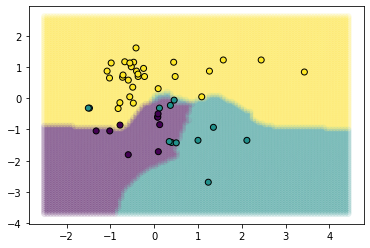

In [50]:
pred = model.predict(Xs)
xx,yy,dft  =p2(Xs)
pred2 = model.predict(dft)
#pred2 = model.predict(X)
plt.scatter(xx.ravel(),yy.ravel(),c =pred2,alpha=0.1)

plt.scatter(Xs[:,0],Xs[:,1],c = y,edgecolor ="black")
print(model.score(X_test, y_test))

In [51]:
model = RandomForestClassifier(criterion = "entropy", n_estimators = 20)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.7692307692307693


0.7692307692307693


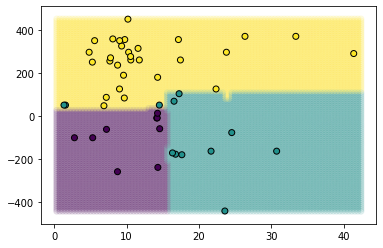

In [52]:
pred = model.predict(X)
xx,yy,dft  =p2(X)
pred2 = model.predict(dft)
plt.scatter(xx.ravel(),yy.ravel(),c =pred2,alpha=0.1)

plt.scatter(X.values[:,0],X.values[:,1],c = y,edgecolor ="black")
print(model.score(X_test, y_test))

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)

X_trains = scaler.transform(X_train)
X_tests = scaler.transform(X_test)

In [54]:

model = LogisticRegression()
model.fit(X_trains, y_train)

print(model.score(X_tests, y_test))

y_predicted = model.predict(X_test)   # predict, sagt y anhand von x voraus

0.7692307692307693


0.6923076923076923


TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

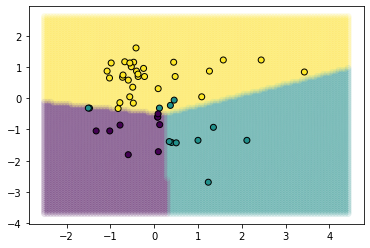

In [55]:
pred = model.predict(Xs)
xx,yy,dft  =p2(Xs)
pred2 = model.predict(dft)

plt.scatter(xx.ravel(),yy.ravel(),c =pred2,alpha=0.1)

plt.scatter(Xs[:,0],Xs[:,1],c = y,edgecolor ="black")
print(model.score(X_test, y_test))

plt.scatter()

In [ ]:

scores = cross_val_score(LogisticRegression(), Xs, y, cv = KFold(n_splits = 10))

print(scores)
print(np.mean(scores))
plt.plot(scores)

In [ ]:

scores = cross_val_score(KNeighborsClassifier(), Xs, y, cv = KFold(n_splits = 10))

print(scores)
print(np.mean(scores))
plt.plot(scores)

In [ ]:

scores = cross_val_score(RandomForestClassifier(), Xs, y, cv = KFold(n_splits = 10))

print(scores)
print(np.mean(scores))
plt.plot(scores)

In [ ]:
X = df[["ruffling","saddling","Em_lit"]]

scaler = StandardScaler()
scaler.fit(X_train)

X_trains = scaler.transform(X_train)
X_tests = scaler.transform(X_test)

In [ ]:

scores = cross_val_score(LogisticRegression(), Xs, y, cv = KFold(n_splits = 10))

print(scores)
print(np.mean(scores))
plt.plot(scores)

In [ ]:

scores = cross_val_score(KNeighborsClassifier(), Xs, y, cv = KFold(n_splits = 10))

print(scores)
print(np.mean(scores))
#plt.plot(scores)

In [ ]:

scores = cross_val_score(RandomForestClassifier(), Xs, y, cv = KFold(n_splits = 10))

print(scores)
print(np.mean(scores))
plt.plot(scores)

In [ ]:
for kn in range(1,10):
    scores = cross_val_score(KNeighborsClassifier(n_neighbors=kn), Xs, y, cv = KFold(n_splits = 10))

    print(kn, np.mean(scores))
    #plt.plot(scores)

In [ ]:
plt.plot([np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=kn), Xs, y, cv = KFold(n_splits = 10))) for kn in range(1,20)])

In [2]:
df = pd.read_csv("/home/hagen/anaconda3/bin/Redpot.csv")

In [27]:
ac=0
ls  =[]
c="Nan"
for i in df[df.columns[-1]]:
    if type(i)!=float:
        c = i
    ls.append(c)

In [23]:
len(df[df.columns[-1]].value_counts())

45

In [31]:
df.shape

(683, 8)

In [33]:
df["literatur"]=ls

In [35]:
df = df[["PDB","literatur"]]

In [ ]:
df

In [58]:
df = df.loc[df["PDB"].drop_duplicates().index]
df  =df.set_index("PDB")

In [64]:
df = df[1:]

In [66]:
df.loc['1CYI/1CYJ']

literatur    4
Name: 1CYI/1CYJ, dtype: object

In [65]:
[i for i in df.index if ("/"in i or ","in i)]

['1CYI/1CYJ', '5MCS, 3CU4', '1CMQ/1CMT', '1CCE/1CCG', '1V9Z/1VB6']

In [68]:
df =df.T
df

PDB,1QPU,2DGE,2CE0,2V07,1F1F,1LS9,1CYI/1CYJ,1CTJ,2V08,2YCC,...,1CMQ/1CMT,1DJ1,1CCK,3CCX,1CCE/1CCG,1DRM,1V9Z,1FHF,1V9Z/1VB6,2OYY
literatur,1,4,4,4,4,4,4,4,4,5,...,70,70,70,70,70,71,71,73,89,96


In [ ]:
['1CYI/1CYJ', '5MCS, 3CU4', '1CMQ/1CMT', '1CCE/1CCG', '1V9Z/1VB6']

In [69]:
df["1CYI"] = df['1CYI/1CYJ']
df["1CYJ"] = df['1CYI/1CYJ']

df["5MCS"] = df['5MCS, 3CU4']
df["3CU4"] = df['5MCS, 3CU4']

df["1CMQ"] = df['1CMQ/1CMT']
df["1CMT"] = df['1CMQ/1CMT']

df["1CCE"] = df['1CCE/1CCG']
df["1CCG"] = df['1CCE/1CCG']

df["1V9Z"] = df['1V9Z/1VB6']
df["1VB6"] = df['1V9Z/1VB6']

In [74]:
df1  =pd.read_csv("df1.csv")
df1

,pdb,ud,Hemetyp,ligup,ligdown,ax_qn,ax_ql,Em_lit,Elektrode,ax_qn_r,...,ligup_r,ligdown_r,Kategorie,HM,*_HIS/HIS,B_-/HIS,C_His/Met,Kategorie2,ruffling,saddling
0,1A6G,ud,B,HIS,CO,HIS/CO,CO/HIS,50.0,NHE,other,...,HIS,other,[],False,0,0,0,other,7.471468,11.105041
1,1A6K,ud,B,HIS,-,HIS/-,-/HIS,50.0,NHE,HIS/-,...,HIS,-,['B_-/HIS'],False,0,1,0,B_-/HIS,14.519887,15.892665
2,1A6M,ud,B,HIS,O2,HIS/O2,HIS/O2,50.0,NHE,other,...,HIS,other,[],False,0,0,0,other,5.978555,9.467277
3,1AW3,du,B,HIS,HIS,HIS/HIS,HIS/HIS,-102.0,SHE,HIS/HIS,...,HIS,HIS,['*_HIS/HIS'],False,1,0,0,*_HIS/HIS,5.321410,3.600227
4,1B5A,du,B,HIS,HIS,HIS/HIS,HIS/HIS,-102.0,SHE,HIS/HIS,...,HIS,HIS,['*_HIS/HIS'],False,1,0,0,*_HIS/HIS,2.802855,2.074508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,6U97,uu,C,MET,HIS,MET/HIS,HIS/MET,179.3,NHE,MET/HIS,...,MET,HIS,['C_His/Met'],False,0,0,1,C_His/Met,14.284085,6.383501
69,2C1D_CSS,dd,C,CSS,HIS,CSS/HIS,CSS/HIS,-432.0,NHE,other,...,other,HIS,[],False,0,0,0,other,9.577443,8.328911
70,2C1D_MET,du,C,MET,HIS,MET/HIS,HIS/MET,189.0,NHE,MET/HIS,...,MET,HIS,['C_His/Met'],False,0,0,1,C_His/Met,9.577443,8.328911
71,2GSM,du,A,-,HIS,-/HIS,-/HIS,300.0,NHE,-/HIS,...,-,HIS,[],False,0,0,0,other,10.496312,10.298891


In [82]:
df =df.T

In [84]:
[df.loc[i[:4]][0] for i in list(df1["pdb"])]

['17',
 '17',
 '17',
 '7',
 '7',
 '7',
 '70',
 '70',
 '70',
 '70',
 '70',
 '70',
 '7',
 '7',
 '4',
 '17',
 '4',
 '4',
 '7',
 '71',
 '17',
 '7',
 '7',
 '7',
 '7',
 '4',
 '73',
 '17',
 '7',
 '17',
 '7',
 '7',
 '57',
 '17',
 '17',
 '17',
 '4',
 '17',
 '17',
 '89',
 '7',
 '17',
 '96',
 '4',
 '70',
 '69',
 '8',
 '69',
 '7',
 '17',
 '7',
 '58',
 '7',
 '70',
 '17',
 '17',
 '17',
 '17',
 '17',
 '59',
 '1',
 '8',
 '4',
 '14',
 '4',
 '8',
 '60',
 '63',
 '69',
 '61',
 '61',
 '17',
 '89']

In [86]:
df1["Quelle"] = [df.loc[i[:4]][0] for i in list(df1["pdb"])]

In [93]:
df1 = df1.set_index("pdb")


KeyError: "None of ['pdb'] are in the columns"

In [97]:
plots = "/home/hagen/Masterarbeit/Arbeit/MasterThesis/img/results/"
plotab = f'{plots}tables/'

In [102]:
df2  =df1[["Hemetyp","ligup","ligdown","Em_lit","Quelle"]]
df2["$E_{red}^{lit}$"]  =df2["Em_lit"]
df2  = df2[["Hemetyp","ligup","ligdown","$E_{red}^{lit}$","Quelle"]]
df2.to_csv(f"{plotab}Redoxquelle.csv")

/home/hagen/anaconda3/envs/KLeich/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [112]:
def f(s):
    if "_" in s:
        a = s.find("_")
        return "$"+s[:a] +"_{"+s[a+1:]+"}"+"$"
    else:
        return s
f("1IQC_HISMET")

'$1IQC_{HISMET}$'

In [115]:
newindex =[f(i) for i in df2.index]

In [117]:
pd.DataFrame(df2.values,columns = list(df2.columns), index=newindex).to_csv(f"{plotab}Redoxquelle.csv")

In [120]:
set(df2["Quelle"])

{'1',
 '14',
 '17',
 '4',
 '57',
 '58',
 '59',
 '60',
 '61',
 '63',
 '69',
 '7',
 '70',
 '71',
 '73',
 '8',
 '89',
 '96'}

In [15]:
df = pd.read_csv("df2.csv")


In [33]:
X =df[["diff_5_nbo","Em_lit"]]

In [34]:
#X = df[["ruffling","saddling","Em_lit"]]

scaler = StandardScaler()
scaler.fit(X)
X= scaler.transform(X)


In [35]:
model =KMeans

In [40]:

model  =KMeans(n_clusters = 2)
model.fit(X)
cluster1 = model.cluster_centers_

In [41]:
model.labels_

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1], dtype=int32)

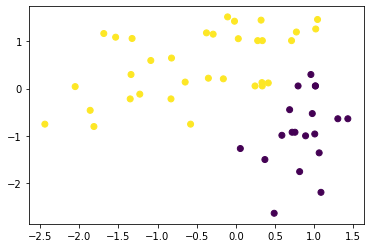

In [42]:
plt.scatter(X[:,0],X[:,1],c=model.labels_)

array([ 0.98858719,  0.230109  ,  0.76284249,  0.60305242, -1.47002136,
        0.87556494,  0.86087505, -0.07118372, -0.5805333 , -1.71944976,
       -1.47661682,  0.49902399,  0.67680169, -1.49460444,  0.98588904,
        1.18375292, -0.1392369 ,  0.82220165, -0.39645994, -1.51948733,
        0.60275263, -1.53087949,  1.16666467,  0.29906156,  0.92742926,
       -1.46492486,  0.84978268,  0.08261047,  0.9927843 ,  1.2515063 ,
       -1.52368444,  0.64052664,  0.88186061, -1.50000073,  0.11169047,
       -0.51427888,  1.25060692, -0.14043608,  1.0020779 ,  1.32675454,
       -1.62081761, -1.52128609,  0.15216262,  0.21421993, -1.50509723,
        0.67890024, -1.54257144, -0.17311359,  0.45105699,  0.94811503,
       -0.5517531 ,  0.13717294])